## 2. Veri776

## 2.1 Download dataset

In [ ]:
%%shell

rm -rf dataset.zip
gdown -O dataset.zip 1ZIkRRCD_wLfHivyVsXSKOaS9t54_MbuN
unzip -q dataset.zip

Downloading...
From (original): https://drive.google.com/uc?id=1ZIkRRCD_wLfHivyVsXSKOaS9t54_MbuN
From (redirected): https://drive.google.com/uc?id=1ZIkRRCD_wLfHivyVsXSKOaS9t54_MbuN&confirm=t&uuid=44285f53-d5c5-4a7c-b671-8db4d303c3bd
To: /content/dataset.zip
100% 997M/997M [00:16<00:00, 62.1MB/s]


# Convert from XML to CSV

In [ ]:
import pandas as pd
import xml.etree.ElementTree as ET
import os

def convert_xml_to_csv(root_folder, file_mapping):
    """
    Chuyển đổi các file XML trong root_folder thành CSV dựa trên file_mapping.

    Parameters:
        root_folder (str): Thư mục chứa các file XML.
        file_mapping (dict): Ánh xạ tên file XML thành tên file CSV.
    """
    for xml_file, csv_file in file_mapping.items():
        xml_path = os.path.join(root_folder, xml_file)
        csv_path = os.path.join(root_folder, csv_file)

        # Đọc file XML với encoding ASCII
        with open(xml_path, "r", encoding="ascii", errors="ignore") as f:
            xml_content = f.read()

        # Phân tích XML từ chuỗi
        root = ET.fromstring(xml_content)

        # Tìm tất cả các phần tử "Item"
        items = root.findall(".//Item")

        # Trích xuất dữ liệu từ các thuộc tính của Item
        data = [item.attrib for item in items]

        # Chuyển thành DataFrame
        df = pd.DataFrame(data)

        # Lưu thành CSV
        df.to_csv(csv_path, index=False)

        print(f"Chuyển đổi {xml_file} -> {csv_file} hoàn tất!")

# Gọi hàm với biến cụ thể
root_folder = "./VeRi776/VeRi/"
file_mapping = {
    "train_label.xml": "train_label.csv",
    "test_label.xml": "test_label.csv"
}

convert_xml_to_csv(root_folder, file_mapping)

Chuyển đổi train_label.xml -> train_label.csv hoàn tất!
Chuyển đổi test_label.xml -> test_label.csv hoàn tất!


# 2.2. EDA

# Download libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Prepare dataset

In [ ]:
import os

root_folder = "./VeRi776/VeRi/"
ds_files={
    "train_label.csv": "train_label.csv",
    "test_label.csv": "test_label.csv",
    "name_train.txt": "name_train.txt",
    "name_test.txt": "name_test.txt",
    "name_query.txt": "name_query.txt",
    "list_color.txt": "list_color.txt",
    "list_type.txt": "list_type.txt"
}

# Read datasets
train_df = pd.read_csv(os.path.join(root_folder, ds_files["train_label.csv"]))
test_df = pd.read_csv(os.path.join(root_folder, ds_files["test_label.csv"]))
color_df= pd.read_csv(os.path.join(root_folder, ds_files["list_color.txt"]), delimiter=" ", header=None)
type_df= pd.read_csv(os.path.join(root_folder, ds_files["list_type.txt"]), delimiter=" ", header=None)
train_df.head()

,imageName,vehicleID,cameraID,colorID,typeID
0,0001_c001_00016450_0.jpg,1,c001,1,4
1,0001_c001_00016460_0.jpg,1,c001,1,4
2,0001_c001_00016470_0.jpg,1,c001,1,4
3,0001_c001_00016480_0.jpg,1,c001,1,4
4,0001_c001_00016490_0.jpg,1,c001,1,4


**Information of the dataset:** train_df, test_df, color_df, type_df

In [ ]:
print(train_df.info())
train_df.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37746 entries, 0 to 37745
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   imageName  37746 non-null  object
 1   vehicleID  37746 non-null  int64 
 2   cameraID   37746 non-null  object
 3   colorID    37746 non-null  int64 
 4   typeID     37746 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.4+ MB
None


,imageName,vehicleID,cameraID,colorID,typeID
25542,0500_c013_00021185_0.jpg,500,c013,4,1
25186,0493_c008_00017560_0.jpg,493,c008,4,1
11891,0248_c016_00015700_0.jpg,248,c016,9,1
33086,0673_c019_00040425_0.jpg,673,c019,10,1
8390,0178_c012_00008580_0.jpg,178,c012,5,1


In [ ]:
print(test_df.info())
test_df.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11579 entries, 0 to 11578
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   imageName  11579 non-null  object
 1   vehicleID  11579 non-null  int64 
 2   cameraID   11579 non-null  object
 3   colorID    11579 non-null  int64 
 4   typeID     11579 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 452.4+ KB
None


,imageName,vehicleID,cameraID,colorID,typeID
8772,0597_c003_00003355_0.jpg,597,c003,10,2
5334,0368_c003_00065485_0.jpg,368,c003,7,2
6986,0476_c016_00010245_0.jpg,476,c016,10,1
10402,0672_c001_00049715_1.jpg,672,c001,10,1
6031,0402_c013_00017495_1.jpg,402,c013,1,8


In [ ]:
color_df, type_df

(    0       1
 0   1  yellow
 1   2  orange
 2   3   green
 3   4    gray
 4   5     red
 5   6    blue
 6   7   white
 7   8  golden
 8   9   brown
 9  10   black,
    0          1
 0  1      sedan
 1  2        suv
 2  3        van
 3  4  hatchback
 4  5        mpv
 5  6     pickup
 6  7        bus
 7  8      truck
 8  9     estate)

In [ ]:
#Convert color and type to csv files
color_df.to_csv("color_table.csv", index=False)
type_df.to_csv("type_table.csv", index=False)

## Print samples of image

In [ ]:
#Change column names
color_df.columns=["colorID", "colorName"]
type_df.columns=["typeID", "typeName"]
#Change type of colorID and typeID to int
color_df["colorID"] = color_df["colorID"].astype(int)
type_df["typeID"] = type_df["typeID"].astype(int)
#Merge color_df and type_df into train_df
df_full = train_df.merge(color_df, on="colorID", how="left")
df_full = df_full.merge(type_df, on="typeID", how="left")
df_full.sample(10)

,imageName,vehicleID,cameraID,colorID,typeID,colorName,typeName
4645,0079_c001_00061930_0.jpg,79,c001,4,6,gray,pickup
6414,0124_c015_00002955_0.jpg,124,c015,7,8,white,truck
26850,0528_c014_00079240_0.jpg,528,c014,4,1,gray,sedan
29225,0568_c004_00015800_1.jpg,568,c004,4,1,gray,sedan
27030,0533_c012_00034295_0.jpg,533,c012,4,1,gray,sedan
37535,0766_c012_00080615_0.jpg,766,c012,10,1,black,sedan
4270,0071_c012_00067870_0.jpg,71,c012,4,6,gray,pickup
17014,0335_c011_00064040_0.jpg,335,c011,7,1,white,sedan
11433,0238_c019_00043560_0.jpg,238,c019,8,1,golden,sedan
2508,0040_c012_00023330_0.jpg,40,c012,6,1,blue,sedan


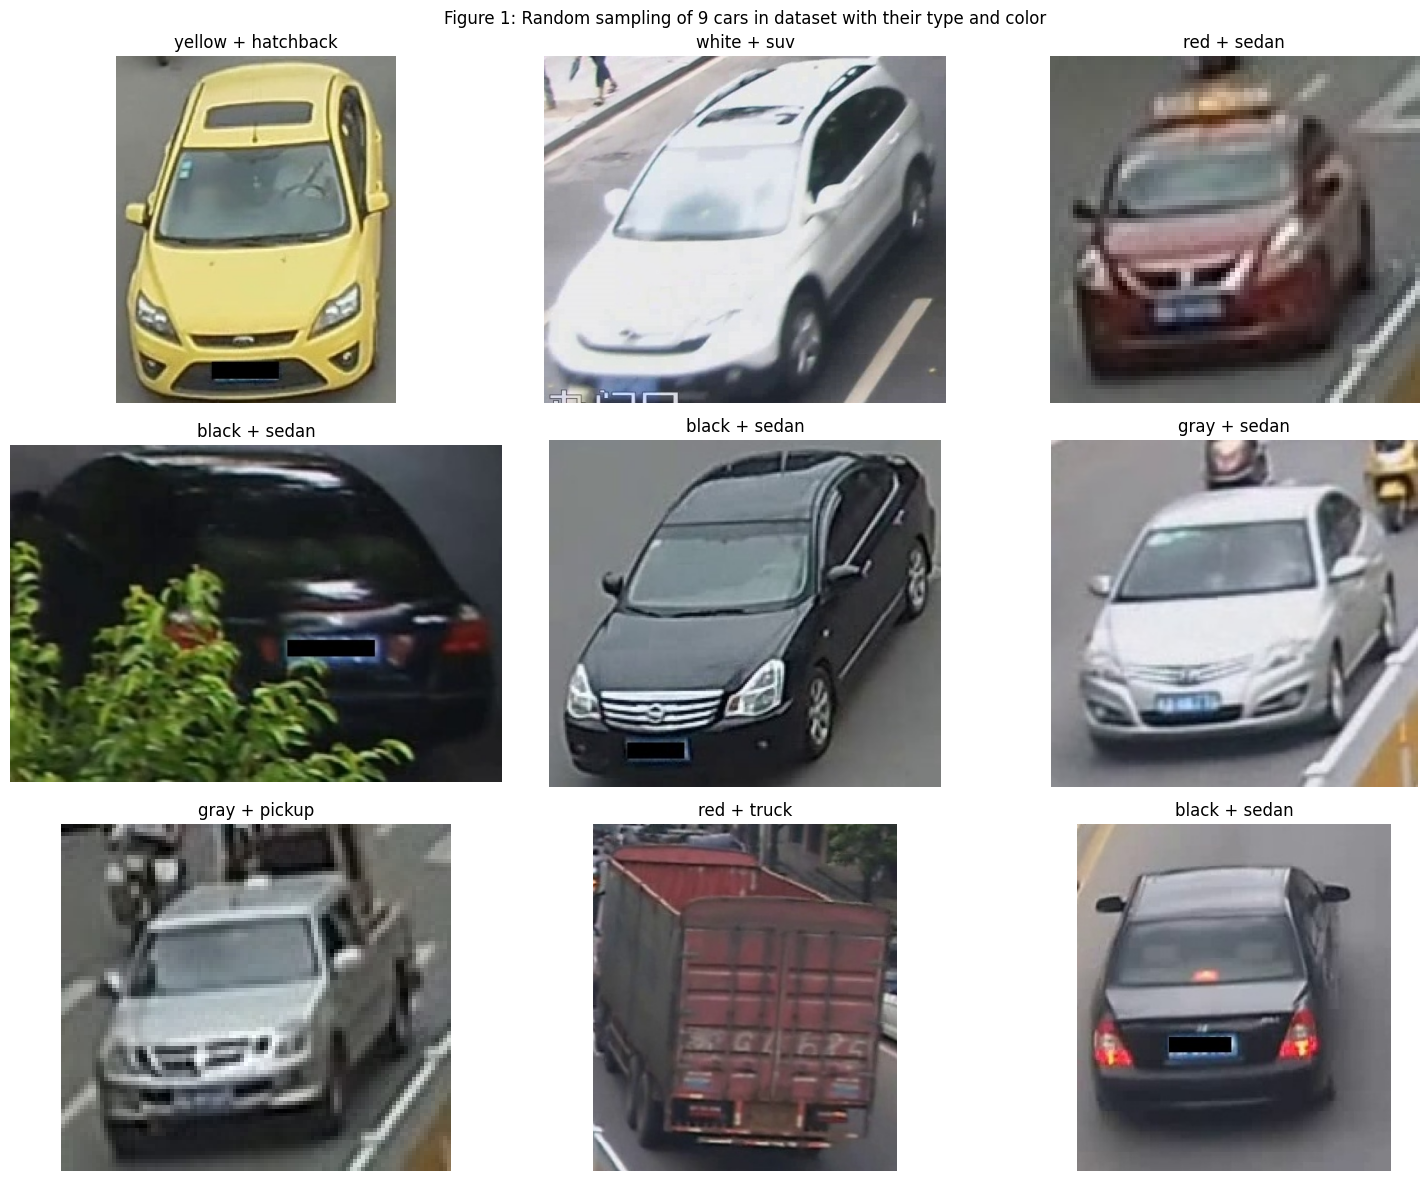

In [ ]:
import matplotlib.pyplot as plt
import os
from PIL import Image

#Sampling 9 sample from df_full
sample_df = df_full.sample(9, random_state=42)

image_folder = "./VeRi776/VeRi/image_train"

n_rows = 3
n_cols = 3
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 12))
axes = axes.flatten()

for ax, (_, row) in zip(axes, sample_df.iterrows()):
    img_path = os.path.join(image_folder, row["imageName"])
    image = Image.open(img_path).convert("RGB")
    ax.imshow(image)
    ax.set_title(f'{row["colorName"]} + {row["typeName"]}', fontsize=12)
    ax.axis('off')

plt.suptitle("Figure 1: Random sampling of 9 cars in dataset with their type and color")
plt.tight_layout()
plt.show()

## Distribution of cars by colors
From the Figure 1, it can be seen that color values were imbalanced: most cars were black and grey, and there were not many cars with colors like orange and brown

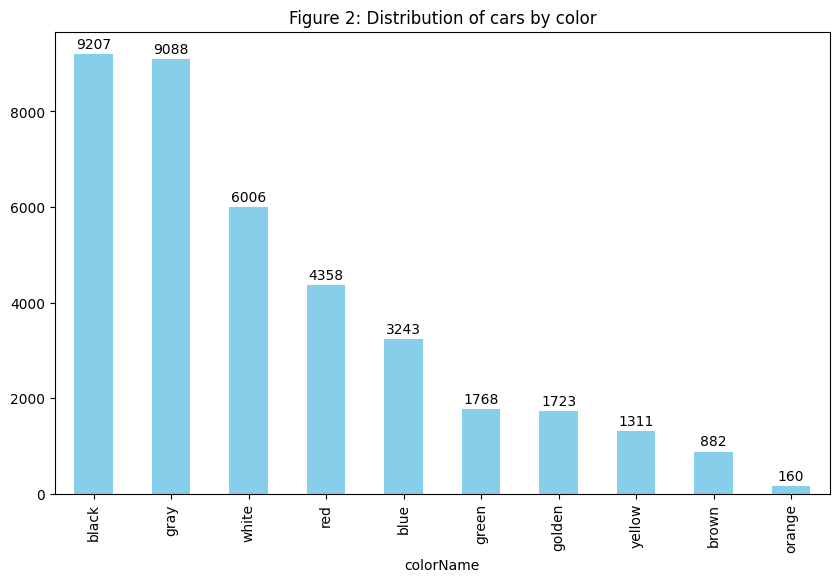

In [ ]:
plt.figure(figsize=(10,6))
ax = df_full.colorName.value_counts().plot(kind="bar", color="skyblue")
plt.title("Figure 2: Distribution of cars by color")
for container in ax.containers:
  ax.bar_label(container, padding=2)
plt.show()

## Distribution of cars by type
From Figure 3, we can conclude that most cars were Sedan type, the number of Sedan cars equals to the sum of all other cars of other types, which indicated extreme imbalance

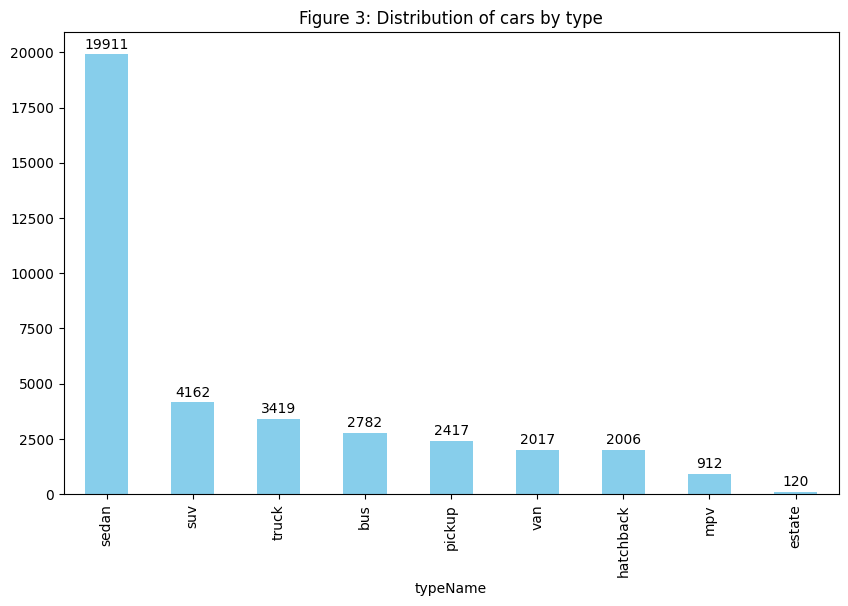

In [ ]:
plt.figure(figsize=(10,6))
ax = df_full.typeName.value_counts().plot(kind="bar", color="skyblue")
plt.title("Figure 3: Distribution of cars by type")
for container in ax.containers:
  ax.bar_label(container, padding=2)
plt.show()

## Correlation between Car Types and Colors
This Figure showed the most common colors for each car type, for example, Sedan cars were mostly black and grey, while buses were mostly blue

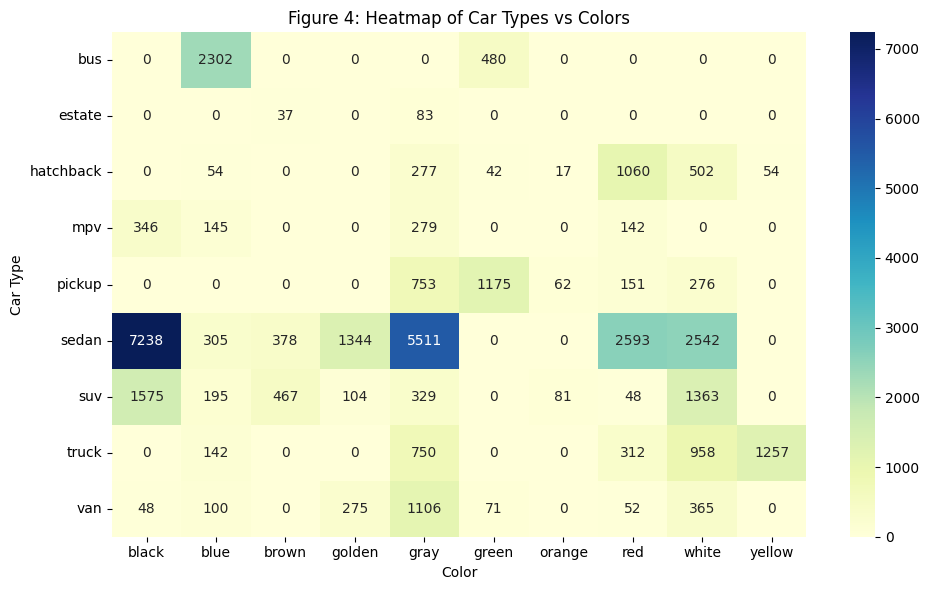

In [ ]:
heatmap_data = pd.crosstab(df_full["typeName"], df_full["colorName"])
heatmap_data
# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu")

plt.title("Figure 4: Heatmap of Car Types vs Colors")
plt.xlabel("Color")
plt.ylabel("Car Type")
plt.tight_layout()
plt.show()

## How many images did each camera capture?
From the Figure, it can be seen that the cameras did not capture the same number of images. CameraID c014 captured at most 2728 images, while c020 captured only 22 images

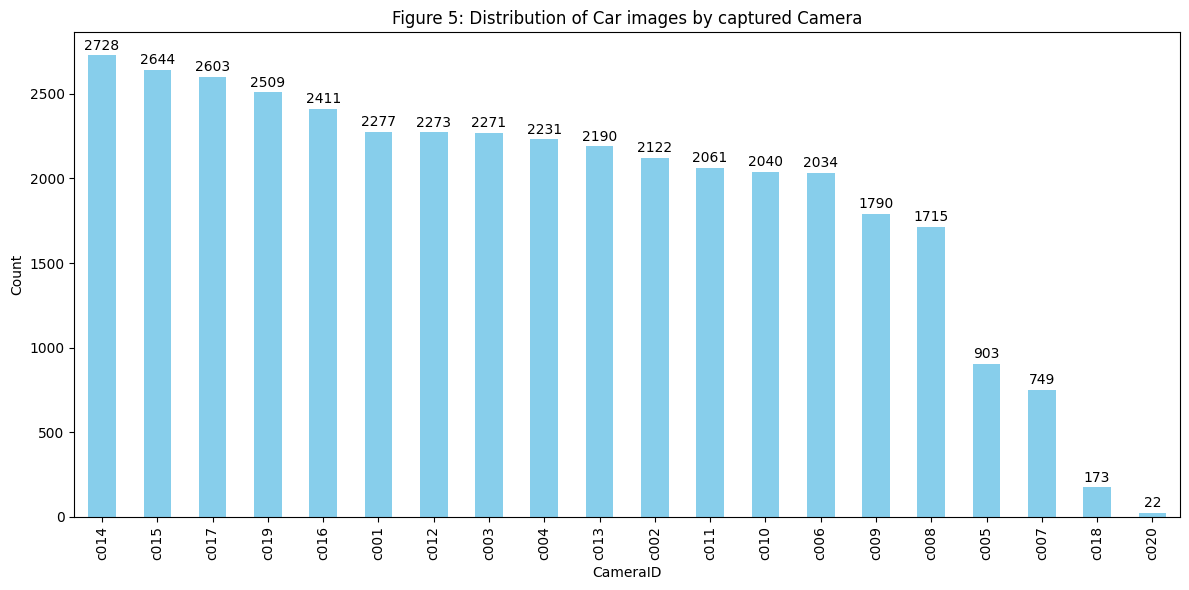

In [ ]:
plt.figure(figsize=(12, 6))
ax = df_full.cameraID.value_counts().plot(kind="bar", color="skyblue")
for container in ax.containers:
  ax.bar_label(container, padding=2)
plt.title("Figure 5: Distribution of Car images by captured Camera")
plt.xlabel("CameraID")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

## How many times were a car captured?
From Figure 6, it can be seen that all the vehicles in this dataset was not captured once, but multiple times, ranging from 10-20 times to nearly 300 times, at maximum

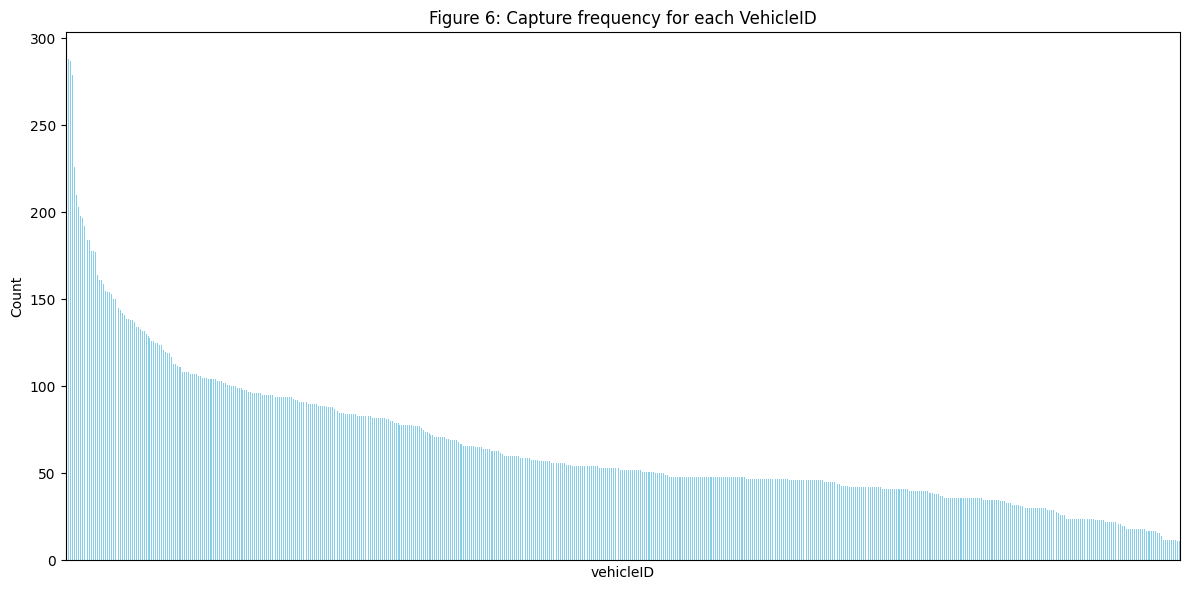

In [ ]:
plt.figure(figsize=(12, 6))
ax = df_full.vehicleID.value_counts().plot(kind="bar", color="skyblue")
plt.title("Figure 6: Capture frequency for each VehicleID")
ax.set_xticks([])
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# 2.3. Training model for car colors

## Install packages

In [ ]:
!pip install scikit-learn torchvision --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 79.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 51.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 49.3 MB/s eta 0:00:00


## Import libraries

In [ ]:
import warnings

# Suppress specific ImportWarnings
warnings.filterwarnings("ignore", category=ImportWarning)
import os
import pandas as pd
from PIL import Image
import torch
import torch.nn as nn
from torchvision import transforms, models
from torchvision.models import resnet18, ResNet18_Weights
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## Prepare the dataset

In [ ]:
# Data loading
root = "./VeRi776/VeRi"
train_df = pd.read_csv(os.path.join(root, "train_label.csv"))
test_df = pd.read_csv(os.path.join(root, "test_label.csv"))
color_df = pd.read_csv("color_table.csv", header=None)
color_df.columns = ['colorID', 'colorName']
color_df["colorID"] = color_df["colorID"].astype(int)

# Match color ids with color names
train_df = train_df.merge(color_df, on="colorID", how="left")
test_df = test_df.merge(color_df, on="colorID", how="left")

class VehicleColorDataset(Dataset):
    def __init__(self, df, img_dir, transform=None):
        self.df = df.reset_index(drop=True)
        self.img_dir = img_dir
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        img_path = os.path.join(self.img_dir, row["imageName"])
        image = Image.open(img_path).convert("RGB")
        label = int(row["colorID"]) - 1  # ID bắt đầu từ 1
        if self.transform:
            image = self.transform(image)
        return image, label

# Calculate mean and std
tmp_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),  # không Normalize lúc này
])

tmp_dataset = VehicleColorDataset(train_df, os.path.join(root, "image_train"), tmp_transform)

def compute_mean_std(dataset):
    loader = DataLoader(dataset, batch_size=64, shuffle=False, num_workers=2)
    mean = 0.0
    std = 0.0
    nb_samples = 0

    for data, _ in tqdm(loader, desc="🔍 Tính mean/std"):
        batch_samples = data.size(0)
        data = data.view(batch_samples, data.size(1), -1)
        mean += data.mean(2).sum(0)
        std += data.std(2).sum(0)
        nb_samples += batch_samples

    mean /= nb_samples
    std /= nb_samples
    return mean, std

mean, std = compute_mean_std(tmp_dataset)
print(" Mean:", mean)
print(" Std:", std)

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean.tolist(), std=std.tolist())
])

# Data preparation
train_split, val_split = train_test_split(train_df, test_size=0.2, stratify=train_df["colorID"], random_state=42)

train_dataset = VehicleColorDataset(train_split, os.path.join(root, "image_train"), transform)
val_dataset = VehicleColorDataset(val_split, os.path.join(root, "image_train"), transform)
test_dataset = VehicleColorDataset(test_df, os.path.join(root, "image_test"), transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64)
test_loader = DataLoader(test_dataset, batch_size=64)

num_classes = train_df["colorID"].nunique()

# RESNET18 + FC
weights = ResNet18_Weights.DEFAULT  # Update new weights for Resnet18
model = resnet18(weights=weights)
model.fc = nn.Linear(model.fc.in_features, num_classes)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

# TRAIN 1 EPOCH
model.train()
for images, labels in tqdm(train_loader, desc="Training (1 epoch)"):
    images, labels = images.to(device), labels.to(device)
    optimizer.zero_grad()
    outputs = model(images)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

🔍 Tính mean/std: 100%|██████████| 590/590 [01:58<00:00,  5.00it/s]


✅ Mean: tensor([0.4209, 0.4206, 0.4268])
✅ Std: tensor([0.1865, 0.1853, 0.1848])


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 183MB/s]
Training (1 epoch): 100%|██████████| 472/472 [01:38<00:00,  4.81it/s]


## Model evaluation
*   **Recall:** the number of True Positives versus all samples that are actually True (including True Positive and False Negative)  
$$
\text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}
$$
* Precision: the number of True Positives among the True outputs from the model
$$
\text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}
$$
*   **f1 score:** The F1 score is the harmonic mean (a kind of average) of precision and recall. The formula:
$$
\text{F1} = 2 \cdot \frac{\text{precision} \cdot \text{recall}}{\text{precision} + \text{recall}} = \frac{2 \cdot \text{TP}}{2 \cdot \text{TP} + \text{FP} + \text{FN}}
$$
*   **Confusion Matrix:** visualize TP, TN, FP, FN

In [ ]:
model.eval()
all_preds = []
all_labels = []

with torch.no_grad(): #use test set to evaluate model without updating weights
    for images, labels in test_loader:
        images = images.to(device)
        outputs = model(images)
        preds = outputs.argmax(dim=1).cpu().numpy()
        all_preds.extend(preds)
        all_labels.extend(labels.numpy())

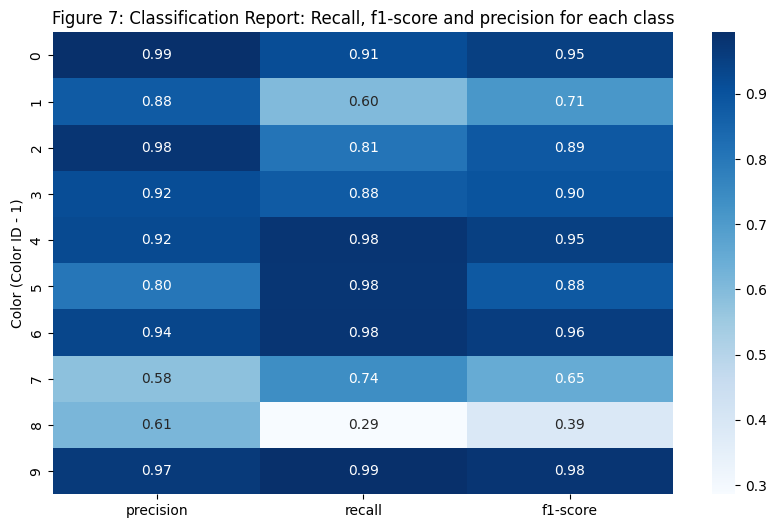

In [ ]:
report = classification_report(all_labels, all_preds, digits=4, output_dict=True)

report_df = pd.DataFrame.from_dict(report).transpose().drop(["accuracy","macro avg","weighted avg"], axis=0).drop("support", axis=1)
plt.figure(figsize=(10,6))
sns.heatmap(report_df, annot=True, fmt=".2f", cmap="Blues")
plt.title("Figure 7: Classification Report: Recall, f1-score and precision for each class")
plt.ylabel("Color (Color ID - 1)")
plt.show()


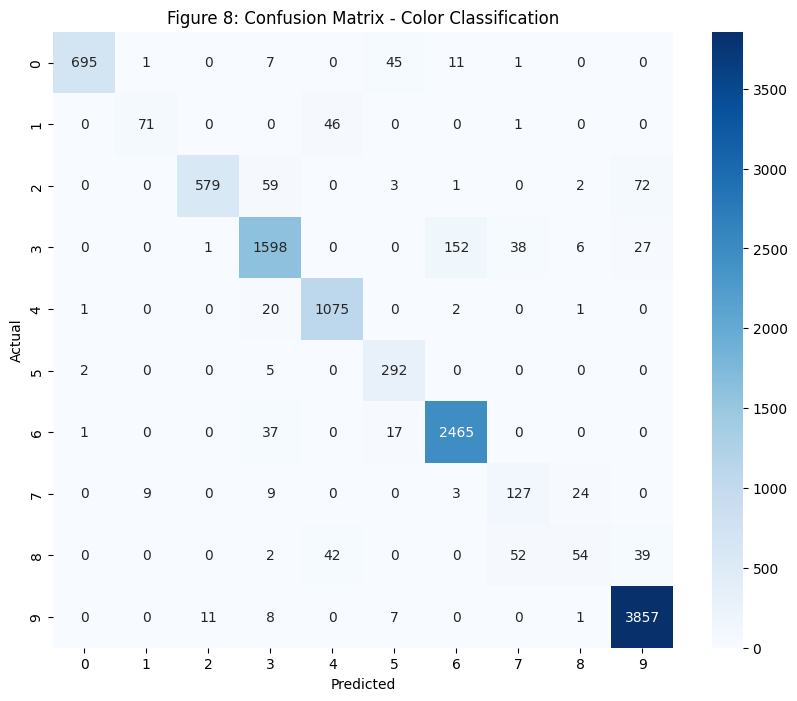

In [ ]:
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Figure 8: Confusion Matrix - Color Classification")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 2.4. Training model for car type classification

## Prepare dataset

In [ ]:
root = "./VeRi776/VeRi"
train_df = pd.read_csv(os.path.join(root, "train_label.csv"))
test_df = pd.read_csv(os.path.join(root, "test_label.csv"))
type_df = pd.read_csv("type_table.csv", header=None)
type_df.columns = ['typeID', 'typeName']
type_df["typeID"] = type_df["typeID"].astype(int)

train_df = train_df.merge(type_df, on="typeID", how="left")
test_df = test_df.merge(type_df, on="typeID", how="left")
train_df.sample(5), test_df.sample(5)

(                      imageName  vehicleID cameraID  colorID  typeID  \
 4599   0078_c004_00035880_0.jpg         78     c004        4       6   
 2003   0029_c013_00072930_0.jpg         29     c013        5       1   
 15751  0307_c015_00074345_0.jpg        307     c015        7       4   
 8297   0171_c019_00046415_0.jpg        171     c019        4       8   
 37243  0758_c013_00053670_0.jpg        758     c013       10       1   
 
         typeName  
 4599      pickup  
 2003       sedan  
 15751  hatchback  
 8297       truck  
 37243      sedan  ,
                       imageName  vehicleID cameraID  colorID  typeID typeName
 6317   0405_c014_00065245_0.jpg        405     c014        1       8    truck
 2575   0174_c011_00043210_0.jpg        174     c011        4       8    truck
 7645   0522_c006_00038720_1.jpg        522     c006        4       1    sedan
 10436  0672_c006_00043380_0.jpg        672     c006       10       1    sedan
 6520   0421_c013_00062930_0.jpg        421 

## Treat imbalance data
From Figure 3, the distribution of car types were extremely imbalance with Sedan cars contributed 50% value of the whole dataset and nearly 5 times more than second class - Suv with only 4162 cars. Therefore, to treat imbalance data, I used 2 techniques:


*   **Undersampling:** set a threshold for maximum number of samples per class. If a class exceed this threshold, its samples will be randomly selected until reach this threshold and discard the ones not selected
*   **Weighted loss function:** class with less samples will have higher weights in determining loss function, this means if the model misclassify samples from a minority class, the loss function will be higher. This helps balancing the model, making it more important to classify the minority class correctly


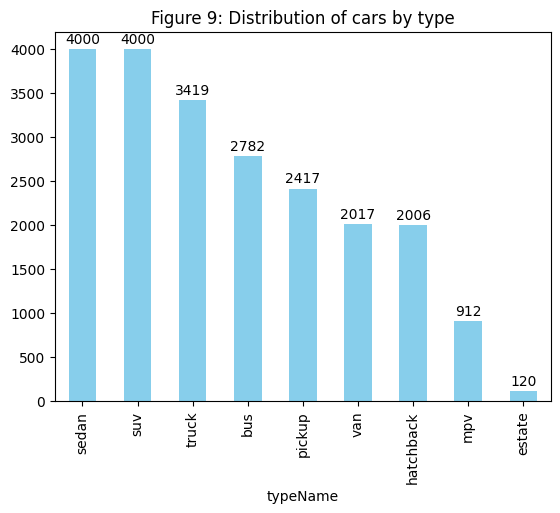

In [ ]:
# Undersampling
class_counts = train_df["typeName"].value_counts()
# print(class_counts)
target_count = 4000
dfs = []

for label in class_counts.index:
    df_label = train_df[train_df["typeName"] == label]
    if len(df_label) > target_count:
        df_label = df_label.sample(target_count, random_state=42)
    dfs.append(df_label)

train_df = pd.concat(dfs).reset_index(drop=True)
ax = train_df.typeName.value_counts().plot(kind="bar",color="skyblue")
for container in ax.containers:
  ax.bar_label(container, padding=2)
plt.title("Figure 9: Distribution of cars by type")
plt.show()

# Weighted loss function
class_weights = 1.0 / torch.tensor(class_counts.values, dtype=torch.float32)
# print(class_weights)
class_weights = class_weights * (len(class_counts) / class_weights.sum()) #Normalize
# print(len(class_counts))
# print(class_weights)
class_weights = class_weights.to(device)

In [ ]:
class VehicleTypeDataset(Dataset):
    def __init__(self, df, img_dir, transform=None):
        self.df = df.reset_index(drop=True)
        self.img_dir = img_dir
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        img_path = os.path.join(self.img_dir, row["imageName"])
        image = Image.open(img_path).convert("RGB")
        label = int(row["typeID"]) - 1  # bắt đầu từ 1 → 0-based
        if self.transform:
            image = self.transform(image)
        return image, label

tmp_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),  # không Normalize lúc này
])

tmp_dataset = VehicleTypeDataset(train_df, os.path.join(root, "image_train"), tmp_transform)

def compute_mean_std(dataset):
    loader = DataLoader(dataset, batch_size=64, shuffle=False, num_workers=2)
    mean = 0.0
    std = 0.0
    nb_samples = 0

    for data, _ in tqdm(loader, desc="🔍 Tính mean/std"):
        batch_samples = data.size(0)
        data = data.view(batch_samples, data.size(1), -1)
        mean += data.mean(2).sum(0)
        std += data.std(2).sum(0)
        nb_samples += batch_samples

    mean /= nb_samples
    std /= nb_samples
    return mean, std

mean, std = compute_mean_std(tmp_dataset)
print("✅ Mean:", mean)
print("✅ Std:", std)

# 🔁 DÙNG TRANSFORM MỚI SAU KHI TÍNH
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean.tolist(), std=std.tolist())
])


🔍 Tính mean/std: 100%|██████████| 339/339 [01:05<00:00,  5.20it/s]

✅ Mean: tensor([0.4183, 0.4173, 0.4201])
✅ Std: tensor([0.1876, 0.1851, 0.1842])


## Split dataset into train, validation, test and put into batch using data loader

In [ ]:
train_split, val_split = train_test_split(train_df, test_size=0.2, stratify=train_df["typeID"], random_state=42)

train_dataset = VehicleTypeDataset(train_split, os.path.join(root, "image_train"), transform)
val_dataset = VehicleTypeDataset(val_split, os.path.join(root, "image_train"), transform)
test_dataset = VehicleTypeDataset(test_df, os.path.join(root, "image_test"), transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64)
test_loader = DataLoader(test_dataset, batch_size=64)

# Số lớp mới là số loại xe
num_classes = train_df["typeID"].nunique()


## Training model

In [ ]:
weights = ResNet18_Weights.DEFAULT  # Update new weights for Resnet18
model = resnet18(weights=weights)
model.fc = nn.Linear(model.fc.in_features, num_classes)
model = model.to(device)

criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

# TRAIN 1 EPOCH
model.train()
for images, labels in tqdm(train_loader, desc="Training (1 epoch)"):
    images, labels = images.to(device), labels.to(device)
    optimizer.zero_grad()
    outputs = model(images)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

Training (1 epoch): 100%|██████████| 271/271 [00:58<00:00,  4.61it/s]


In [ ]:
model.eval()
all_preds = []
all_labels = []

with torch.no_grad(): #use test set to evaluate model without updating weights
    for images, labels in test_loader:
        images = images.to(device)
        outputs = model(images)
        preds = outputs.argmax(dim=1).cpu().numpy()
        all_preds.extend(preds)
        all_labels.extend(labels.numpy())

## Model evaluation

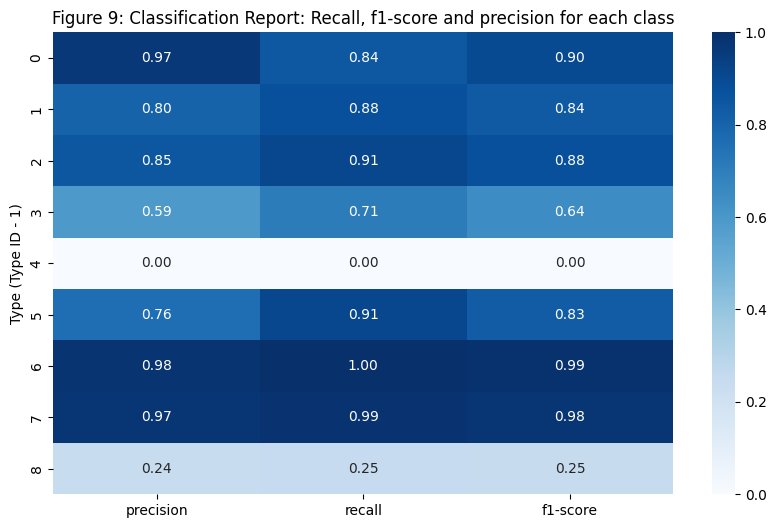

In [ ]:
report = classification_report(all_labels, all_preds, digits=4, output_dict=True, zero_division=0)

report_df = pd.DataFrame.from_dict(report).transpose().drop(["accuracy","macro avg","weighted avg"], axis=0).drop("support", axis=1)
plt.figure(figsize=(10,6))
sns.heatmap(report_df, annot=True, fmt=".2f", cmap="Blues")
plt.title("Figure 9: Classification Report: Recall, f1-score and precision for each class")
plt.ylabel("Type (Type ID - 1)")
plt.show()


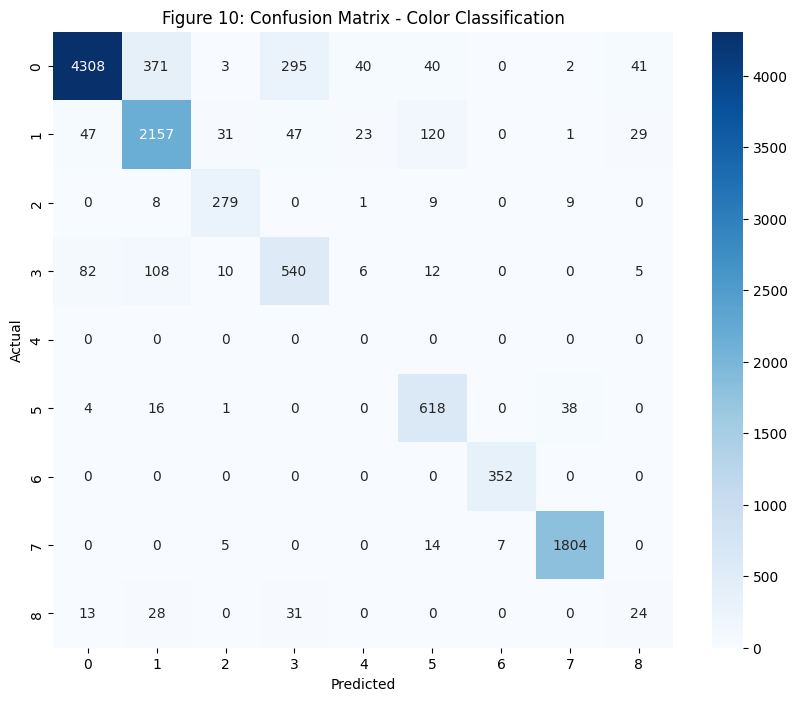

In [ ]:
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Figure 10: Confusion Matrix - Color Classification")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
print(test_df.typeName.value_counts())
print(type_df)

typeName
sedan        5100
suv          2455
truck        1830
hatchback     763
pickup        677
bus           352
van           306
estate         96
Name: count, dtype: int64
   typeID   typeName
0       0          1
1       1      sedan
2       2        suv
3       3        van
4       4  hatchback
5       5        mpv
6       6     pickup
7       7        bus
8       8      truck
9       9     estate
